# Introduction

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. ([wikipedia](https://en.wikipedia.org/wiki/Loan))

### **The major aim of this notebook is to predict which of the customers will have their loan approved.**

![](https://i.pinimg.com/originals/41/b0/08/41b008395e8e7f888666688915750d1f.gif)

# Data Id 📋

This dataset is named [Loan Prediction Dataset](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset) data set. The dataset contains a set of **613** records under **13 attributes**:

![](http://miro.medium.com/max/795/1*cAd_tqzgCWtCVMjEasWmpQ.png)

## The main objective for this dataset:
Using machine learning techniques to predict loan payments.

### target value: `Loan_Status`

# Libraries 📕📗📘

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('LoanData.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [12]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Detection & Handling

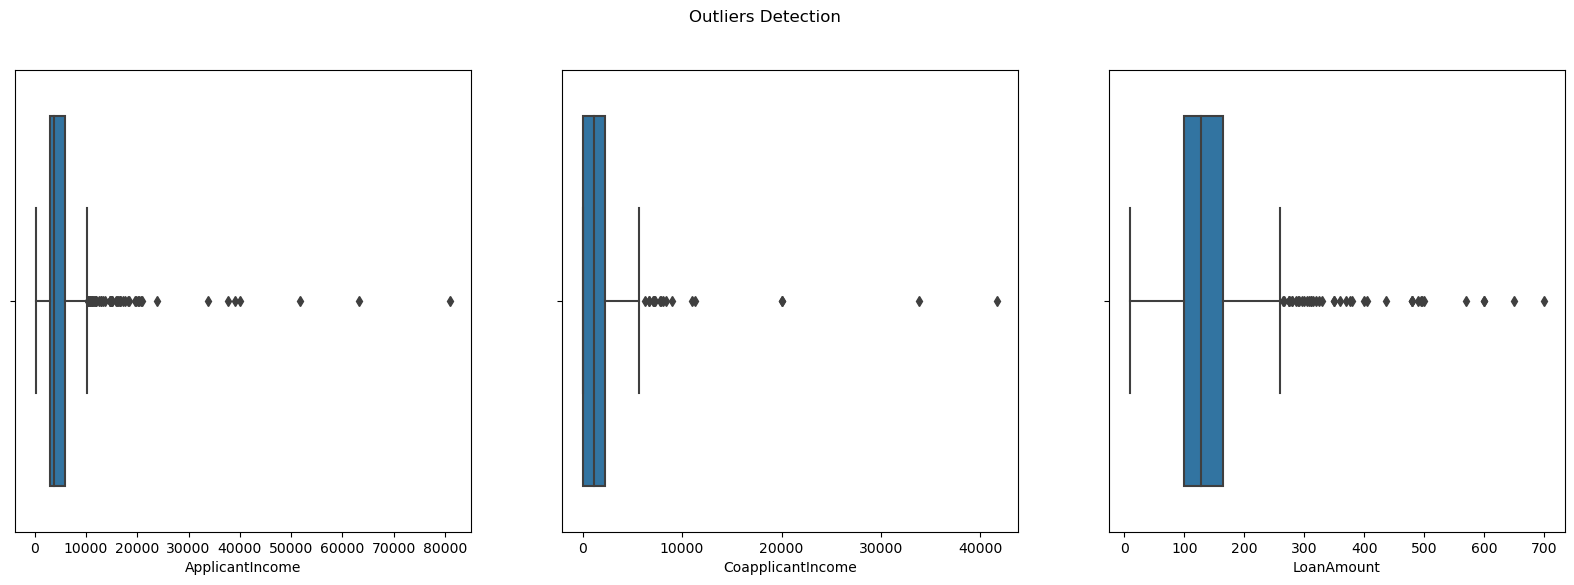

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x=data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x=data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x=data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [26]:
print('Before Removing the Outliera', data.shape)
data = data[data['ApplicantIncome']<25000]
print('After Removing the Outliers', data.shape)

Before Removing the Outliera (614, 13)
After Removing the Outliers (607, 13)


In [27]:
print('Before Removing the Outliera', data.shape)
data = data[data['CoapplicantIncome']<12000]
print('After Removing the Outliers', data.shape)

Before Removing the Outliera (607, 13)
After Removing the Outliers (603, 13)


In [28]:
print('Before Removing the Outliera', data.shape)
data = data[data['LoanAmount']<400]
print('After Removing the Outliers', data.shape)

Before Removing the Outliera (603, 13)
After Removing the Outliers (591, 13)


# Analysis

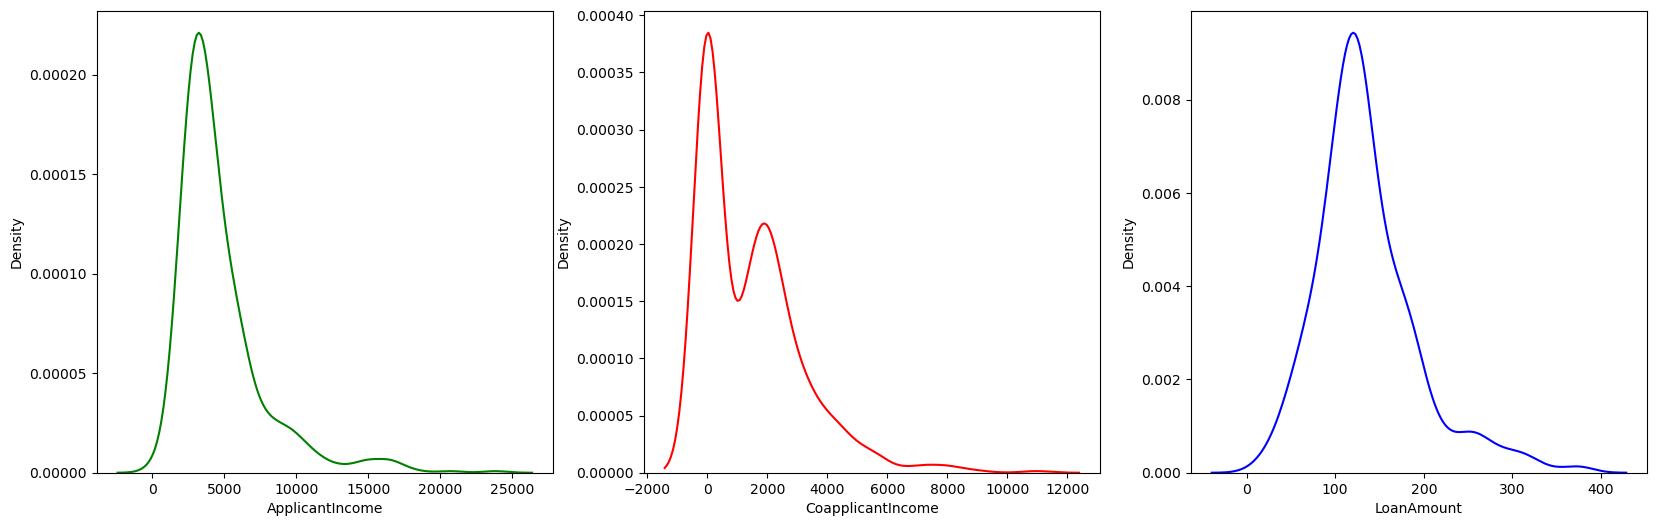

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x=data['ApplicantIncome'], color='green')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x=data['CoapplicantIncome'], color='red')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x=data['LoanAmount'], color='blue')

plt.show()

In [31]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

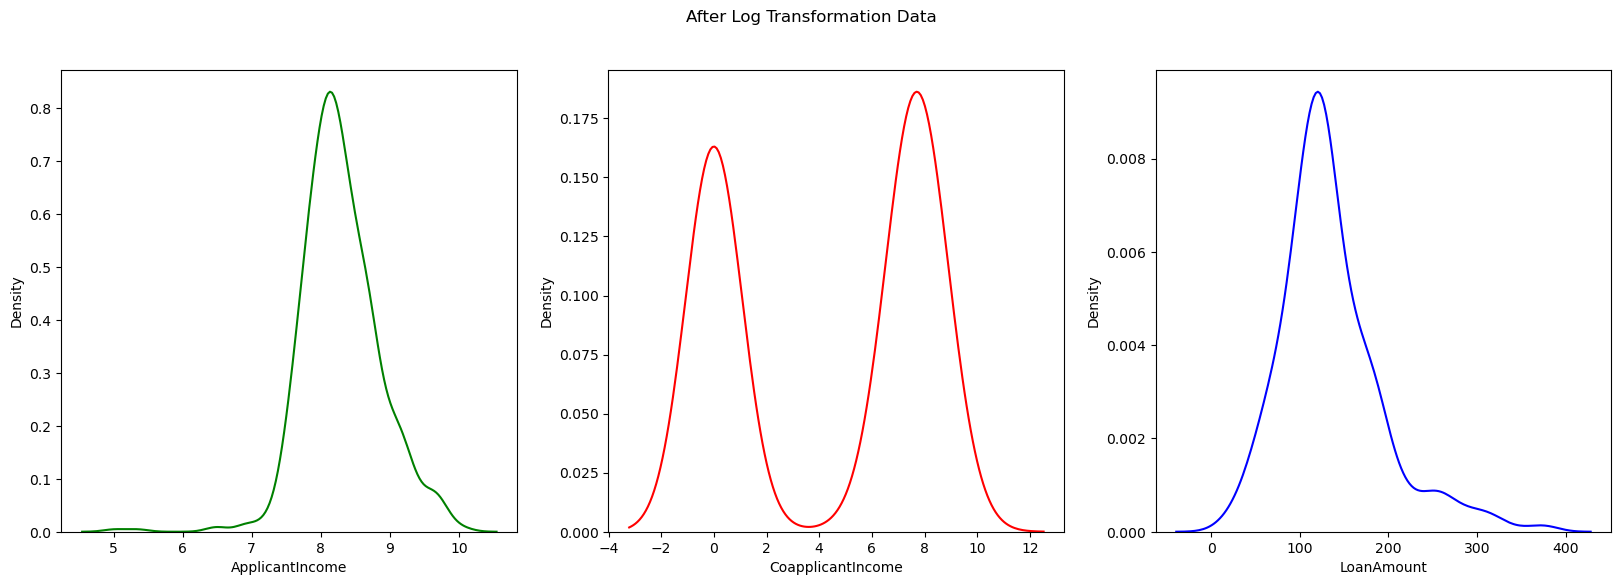

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x=data['ApplicantIncome'], color='green')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x=data['CoapplicantIncome'], color='red')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x=data['LoanAmount'], color='blue')

plt.suptitle("After Log Transformation Data")
plt.show()

In [36]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [37]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [38]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

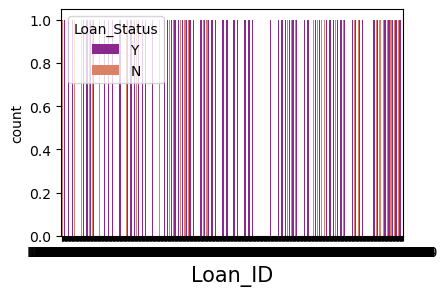

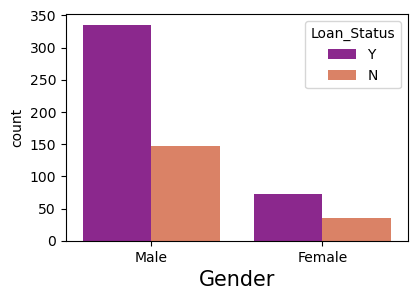

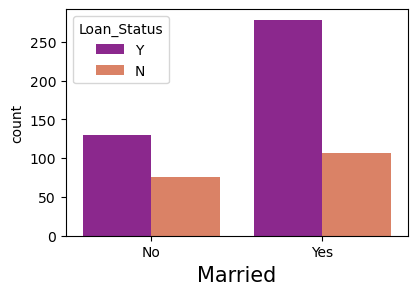

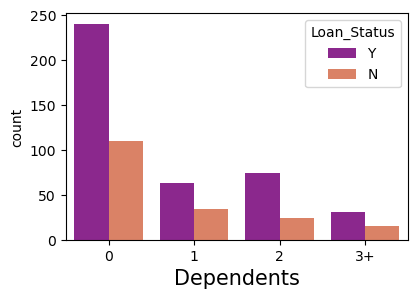

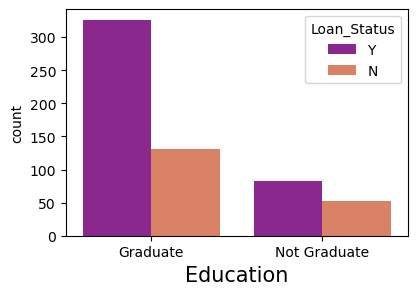

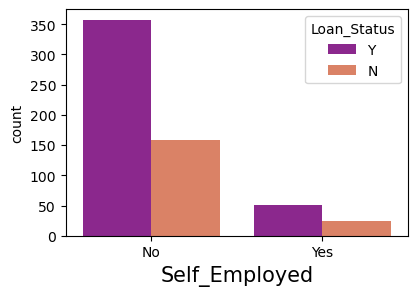

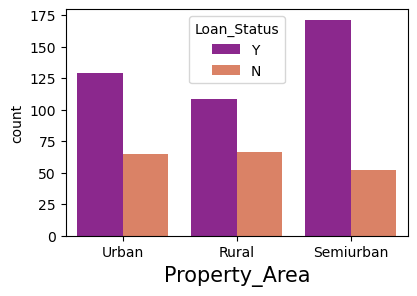

In [42]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(3, 3,1)
    sns.countplot(x=i, hue= 'Loan_Status', data=data, palette='plasma')
    plt.xlabel(i, fontsize = 15)

In [43]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


<Axes: xlabel='Loan_Status'>

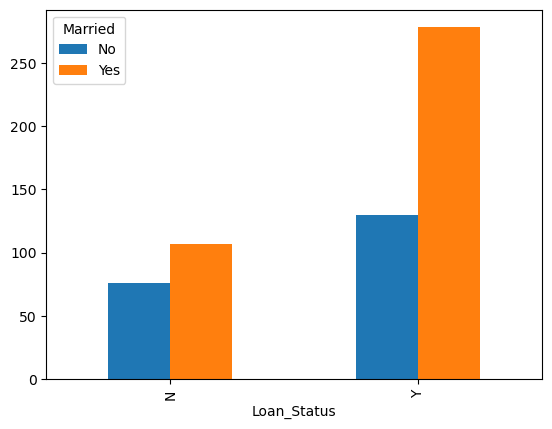

In [46]:
# plt Categorical with Target

print(pd.crosstab(data['Loan_Status'], data['Married']))
pd.crosstab(data['Loan_Status'], data['Married']).plot(kind='bar')

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


<Axes: xlabel='Loan_Status'>

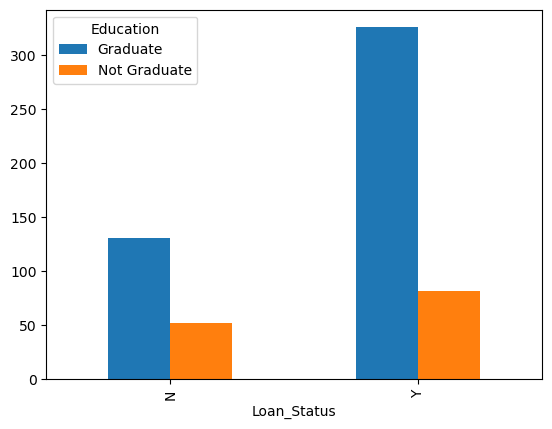

In [49]:
print(pd.crosstab(data['Loan_Status'], data['Education']))
pd.crosstab(data['Loan_Status'], data['Education']).plot(kind = 'bar')

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


<Axes: xlabel='Loan_Status'>

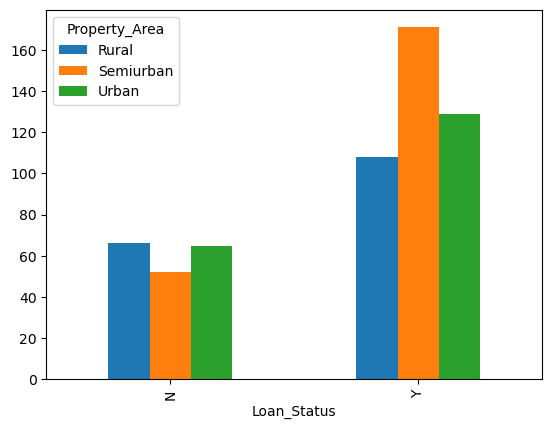

In [50]:
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))
pd.crosstab(data['Loan_Status'], data['Property_Area']).plot(kind='bar')

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


<Axes: xlabel='Loan_Status'>

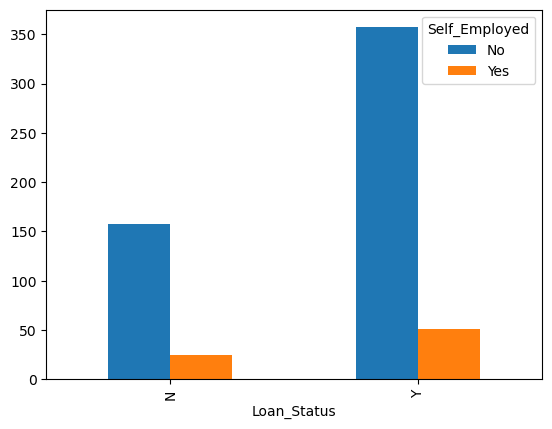

In [51]:
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
pd.crosstab(data['Loan_Status'], data['Self_Employed']).plot(kind='bar')

In [53]:
data.select_dtypes('object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [54]:
data = data.drop(columns=['Loan_ID'])

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [56]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [57]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban', 'Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'),(0,1,1,1))

In [58]:
data.select_dtypes('object')

""
0
1
2
3
4
...
609
610
611
612


In [59]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0


# Data Division

In [61]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'])

In [62]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,0.000000,71.0,360.0,1.0,0
610,1,1,1,1,0,8.320205,0.000000,40.0,180.0,1.0,0
611,1,1,1,1,0,8.996157,5.484797,253.0,360.0,1.0,1
612,1,1,1,1,0,8.933664,0.000000,187.0,360.0,1.0,1


In [63]:
x.shape

(591, 11)

In [64]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

In [65]:
y.shape

(591,)

# Handling Imbalance Data

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
X_resmple, y_resmple = SMOTE().fit_resample(x, y.values.ravel())

In [68]:
print(X_resmple.shape)
print(y_resmple.shape)

(816, 11)
(816,)


# Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_resmple, y_resmple, test_size=0.2, random_state=0)

In [81]:
X_train.shape

(652, 11)

In [82]:
X_test.shape

(164, 11)

In [83]:
y_train.shape

(652,)

In [74]:
X_train.shape

(652, 11)

In [76]:
y_test.shape

(164,)

In [84]:
X_test.shape

(164, 11)

# Model Building

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [97]:
lr = LogisticRegression()

In [98]:
lr.fit(X_train, y_train)

C:\Users\Adnan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred = lr.predict(X_test)

In [100]:
print("Training Accuracy", lr.score(X_train, y_train))
print("Testing Accuracy", lr.score(X_test, y_test))

Training Accuracy 0.7776073619631901
Testing Accuracy 0.774390243902439


In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75        82
           1       0.73      0.88      0.80        82

    accuracy                           0.77       164
   macro avg       0.79      0.77      0.77       164
weighted avg       0.79      0.77      0.77       164



In [103]:
print("Our Model Accuracy is", accuracy_score(y_test, y_pred))

Our Model Accuracy is 0.774390243902439


In [105]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
588,1,0,0,1,0,8.465900,0.000000,94.0,360.0,1.0,1,1
252,1,0,0,0,1,7.856707,7.681560,104.0,360.0,1.0,0,1
60,1,1,0,1,0,7.824046,8.241967,120.0,360.0,1.0,1,1
226,1,1,0,0,1,8.462737,0.000000,138.0,360.0,1.0,1,0
327,1,1,0,1,1,8.668712,7.678326,184.0,360.0,1.0,1,1


In [106]:
model_prediction = np.array([[1,0,0,1,0,7.8,8.3,184,360,1.0,1]])

In [107]:
prediction = lr.predict(model_prediction)

C:\Users\Adnan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [109]:
if prediction == 1:
    print("Loan Has Been Approved!!!")
else:
    print("Loan Has not Been Approved!!!")

Loan Has Been Approved!!!
